# Project - Predictive Modelling

## Import Libraries

1. General libraries to work with data and visualize data:

In [1]:
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. sklearn libraries to perform regression and classifications:

In [2]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 3. CART
from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

3. To check model performance:

In [3]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [4]:
# To visualize the decision tree

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

##--conda install pydot
##--conda install -c anaconda graphviz

# 2 Logistic Regression, LDA, CART

Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

## 2.1 Data Ingestion:

Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

### Import dataset and explore

In [5]:
cData= pd.read_excel('Contraceptive_method_dataset.xlsx')

In [6]:
cData.shape

(1473, 10)

There are 1473 rows and 10 columns in the dataset

In [7]:
cData.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [8]:
cData.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [9]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [10]:
cData.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

Most of the numerical columns are of type float64, int64 already.

'Husband_Occupation' data type is already encoded from categorical variable.

Categorical columns like Education (both 'Wife_ education', 'Husband_education'), 'Wife_religion', 'Wife_Working' , 'Standard_of_living_index', 'Media_exposure', 'Contraceptive_method_used' are object type. These can be encoded.

In [11]:
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [12]:
cData.describe(include='object').T

,count,unique,top,freq
Wife_ education,1473,4,Tertiary,577
Husband_education,1473,4,Tertiary,899
Wife_religion,1473,2,Scientology,1253
Wife_Working,1473,2,No,1104
Standard_of_living_index,1473,4,Very High,684
Media_exposure,1473,2,Exposed,1364
Contraceptive_method_used,1473,2,Yes,844


In [13]:
cData_out = cData.loc[:, [
    'Wife_age', 'No_of_children_born','Husband_Occupation']]

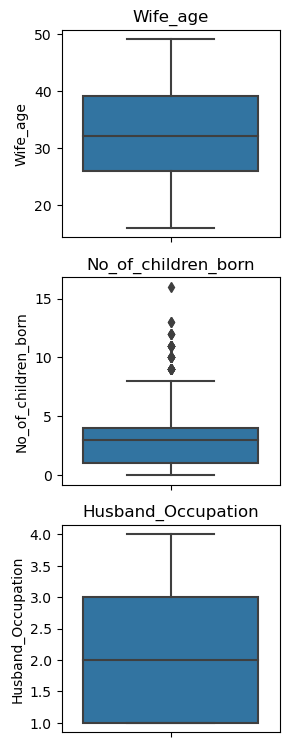

In [14]:
#cData_out = cData.drop(['Contraceptive_method_used'], axis=1)
plt.figure(figsize=(3, 10))

feature_list = cData_out.columns
for i in range(len(feature_list)):
    plt.subplot(4,1, i + 1)
    sns.boxplot(y = cData_out[feature_list[i]], data=cData_out,dodge=True)
    plt.title(feature_list[i])
    plt.tight_layout()

There are outliers in the no of children category.

### Missing Values

In [15]:
cData.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [16]:
cData.apply(lambda x: x.isnull().value_counts())

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
False,1402,1473.0,1473.0,1452,1473.0,1473.0,1473.0,1473.0,1473.0,1473.0
True,71,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN


There are 71 missing values in Wife_age column, 21 missing values in No_of_children_born column

In [17]:
#cData['Wife_age'].fillna(cData['Wife_age'].median(), inplace=True)

In [18]:
#cData['No_of_children_born'].value_counts().to_frame()

In [19]:
#cData['No_of_children_born'].fillna('2', inplace=True)
# 'No_of_children_born' with frequent.

In [20]:
cData.dropna(subset=['Wife_age', 'No_of_children_born'], inplace=True)
cData = cData.reset_index(drop=True)

In [21]:
cData.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [22]:
# let's convert 'No_of_children_born' object column from object type to float type
i='No_of_children_born'
cData[i] = cData[i].astype(float)

In [23]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1381 non-null   float64
 1   Wife_ education            1381 non-null   object 
 2   Husband_education          1381 non-null   object 
 3   No_of_children_born        1381 non-null   float64
 4   Wife_religion              1381 non-null   object 
 5   Wife_Working               1381 non-null   object 
 6   Husband_Occupation         1381 non-null   int64  
 7   Standard_of_living_index   1381 non-null   object 
 8   Media_exposure             1381 non-null   object 
 9   Contraceptive_method_used  1381 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 108.0+ KB


### Outliers

The outliers are in the No_of_children_born category. It would be necessary to treat the outliers in this feature.

In [24]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [25]:
for i in cData_out.columns:
    LL,UL=remove_outlier(cData[i])
    cData[i] = np.where(cData[i] > UL, UL, cData[i])
    cData[i] = np.where(cData[i] < LL, LL, cData[i])

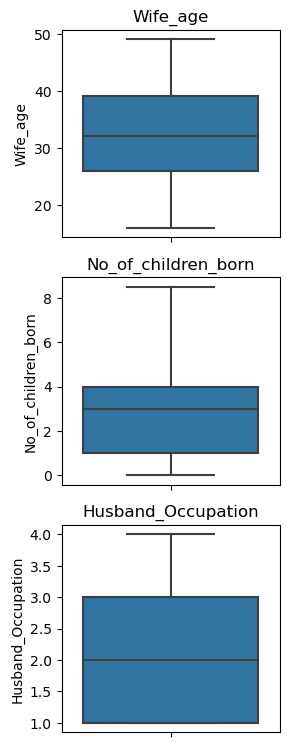

In [26]:
plt.figure(figsize=(3, 10))

feature_list = cData_out.columns
for i in range(len(feature_list)):
    plt.subplot(4,1, i + 1)
    sns.boxplot(y = cData[feature_list[i]], data=cData,dodge=True)
    plt.title(feature_list[i])
    plt.tight_layout()

### Univariate Analysis

In [27]:
k=6
k_child_df = cData[cData['No_of_children_born']> k]
k_child_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,136.0,NaN,NaN,NaN,41.345588,5.542267,29.0,37.0,42.0,46.0,49.0
Wife_ education,136,4,Primary,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,136,4,Tertiary,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,136.0,NaN,NaN,NaN,7.8125,0.626387,7.0,7.0,8.0,8.5,8.5
Wife_religion,136,2,Scientology,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,136,2,No,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,136.0,NaN,NaN,NaN,2.198529,0.814861,1.0,2.0,2.0,3.0,4.0
Standard_of_living_index,136,4,Very High,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,136,2,Exposed,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,136,2,No,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN


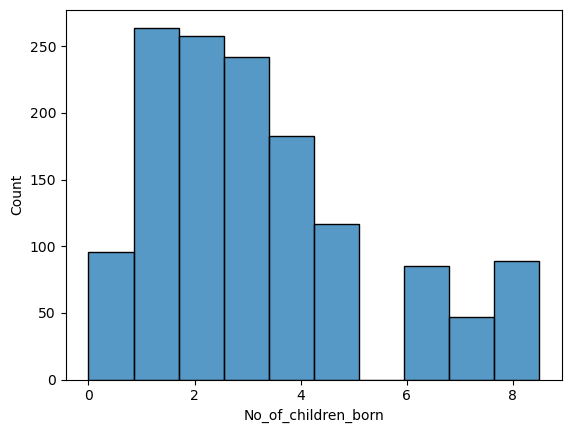

In [28]:
sns.histplot(cData['No_of_children_born'],bins=10);

Common 'No_of_children_born' are 2/3/4

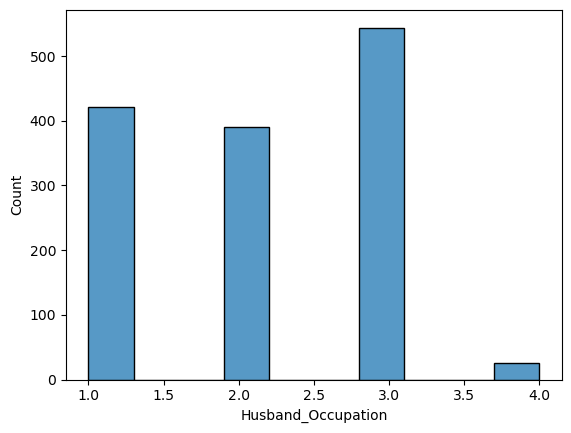

In [29]:
sns.histplot(cData['Husband_Occupation'],bins=10);

'Uneducated' Husband_education are very less.

### Bivariate Analysis

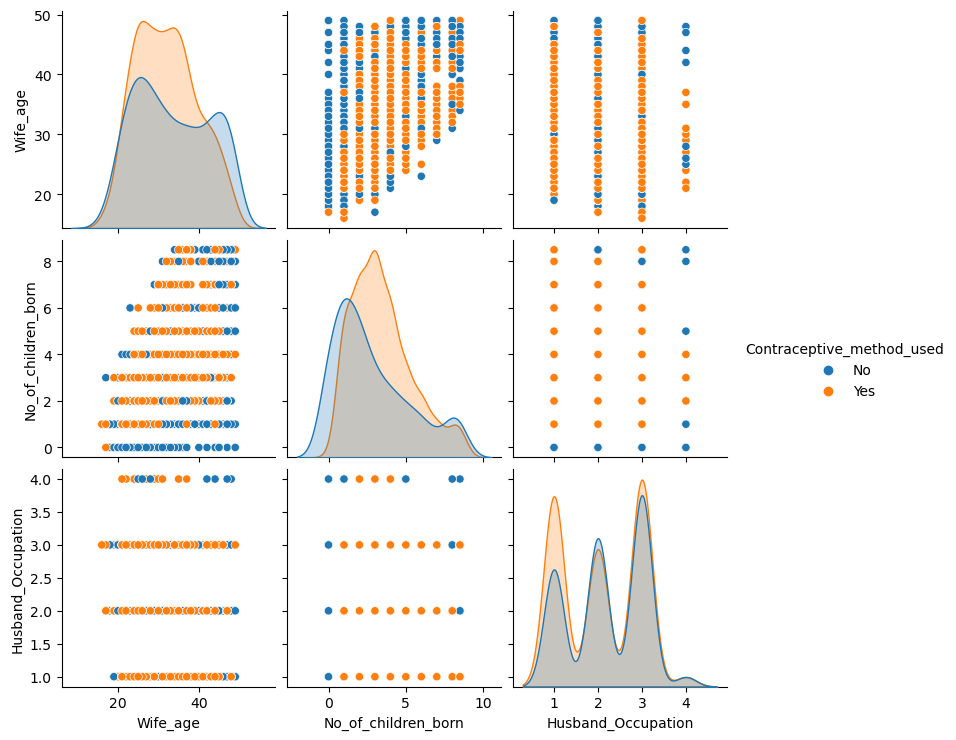

In [30]:
sns.pairplot(cData, hue='Contraceptive_method_used', diag_kind='kde');

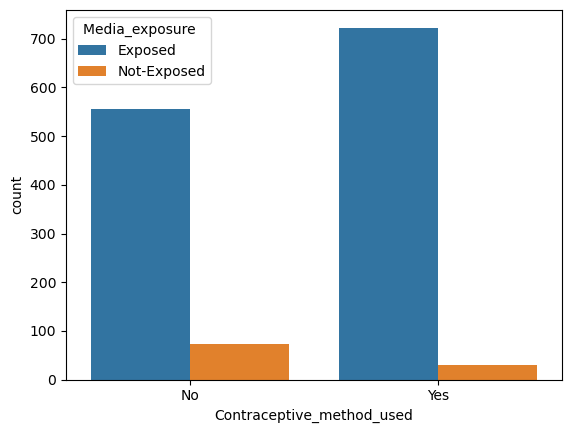

In [31]:
sns.countplot(x='Contraceptive_method_used',data=cData,hue='Media_exposure ');

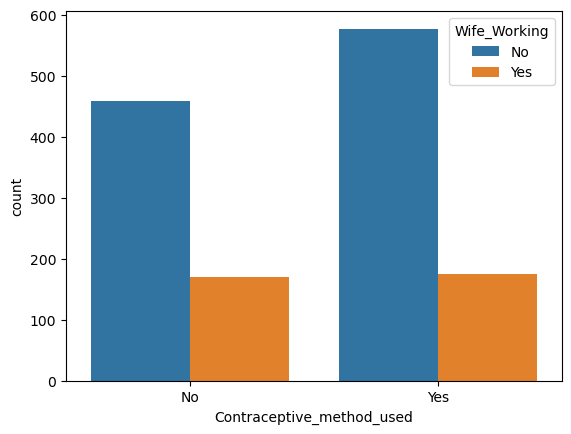

In [32]:
sns.countplot(x='Contraceptive_method_used',data=cData,hue='Wife_Working');

Media exposure alone seems to have no impact on contraception

### Mutlivariate Analysis

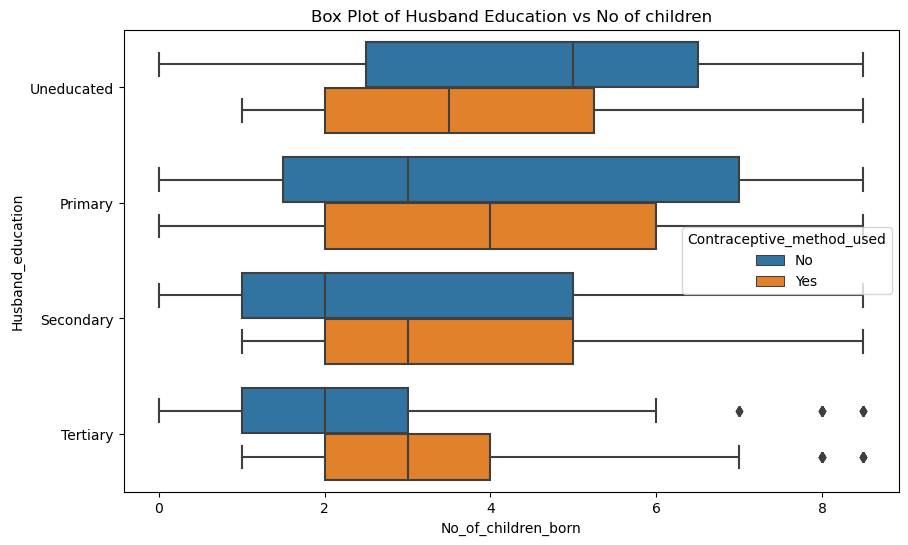

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No_of_children_born', y= 'Husband_education',hue='Contraceptive_method_used',  order = ['Uneducated',"Primary", "Secondary",'Tertiary'],data=cData)
plt.title('Box Plot of Husband Education vs No of children')
plt.show();

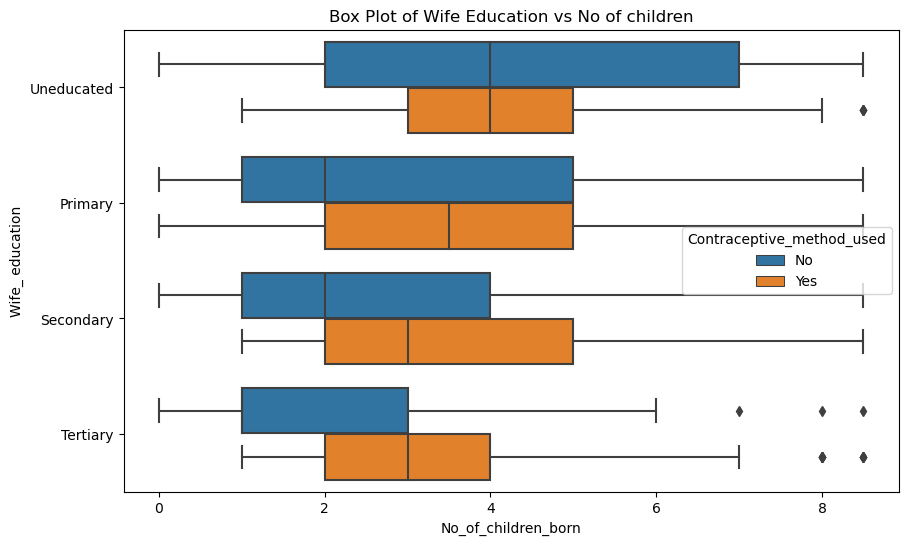

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No_of_children_born', y= 'Wife_ education',hue='Contraceptive_method_used',  order = ['Uneducated',"Primary", "Secondary",'Tertiary'],data=cData)
plt.title('Box Plot of Wife Education vs No of children')
plt.show();

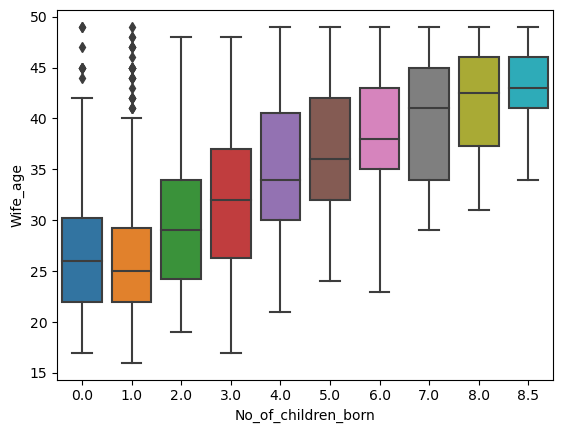

In [35]:
sns.boxplot(x='No_of_children_born', y='Wife_age', data=cData)
plt.show();

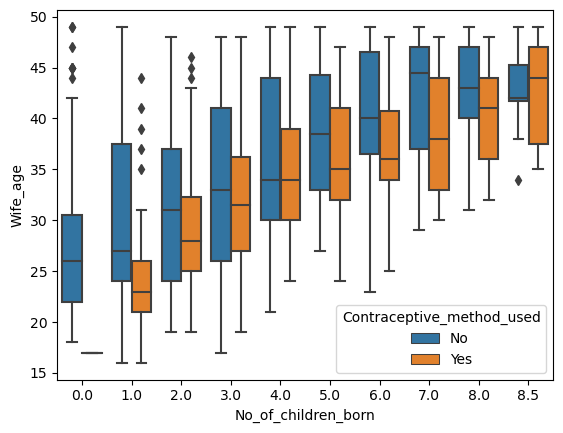

In [36]:
sns.boxplot(x='No_of_children_born', y='Wife_age', hue='Contraceptive_method_used', data=cData)
plt.show();

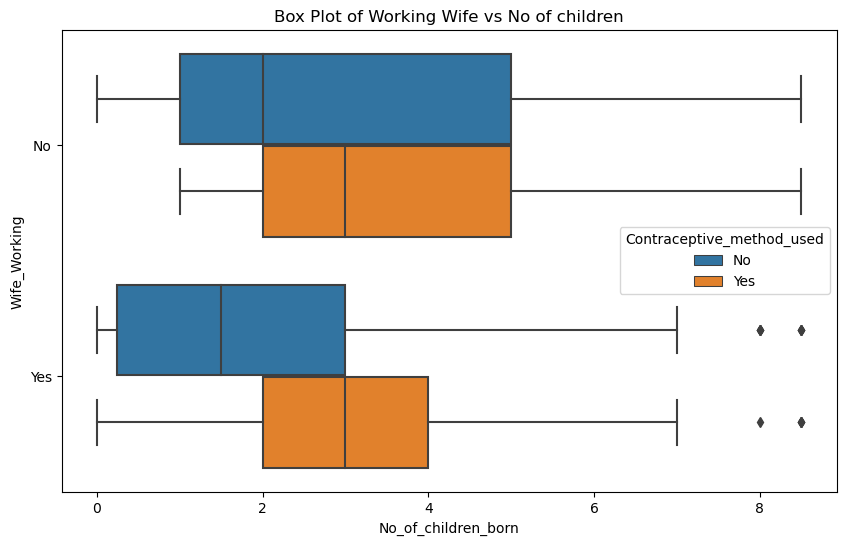

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No_of_children_born', y= 'Wife_Working',hue='Contraceptive_method_used',data=cData)
plt.title('Box Plot of Working Wife vs No of children')
plt.show();

## 2.2 Data Preparation

Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

### 2.2.1 Encode Data

In [38]:
for i in cData.columns:
    if cData[i].dtypes== 'object':
        print(i, ': \n')
        print(cData[i].value_counts())
        print('       ****       ')

Wife_ education : 

Tertiary      538
Secondary     389
Primary       310
Uneducated    144
Name: Wife_ education, dtype: int64
       ****       
Husband_education : 

Tertiary      846
Secondary     327
Primary       165
Uneducated     43
Name: Husband_education, dtype: int64
       ****       
Wife_religion : 

Scientology        1179
Non-Scientology     202
Name: Wife_religion, dtype: int64
       ****       
Wife_Working : 

No     1036
Yes     345
Name: Wife_Working, dtype: int64
       ****       
Standard_of_living_index : 

Very High    633
High         408
Low          215
Very Low     125
Name: Standard_of_living_index, dtype: int64
       ****       
Media_exposure  : 

Exposed        1278
Not-Exposed     103
Name: Media_exposure , dtype: int64
       ****       
Contraceptive_method_used : 

Yes    752
No     629
Name: Contraceptive_method_used, dtype: int64
       ****       


In [39]:
## Convert the target variable to Nominal
## We are coding up the 'Contraceptive_method_used' variable in Yes 1,No 0 based on value counts.

cData['Contraceptive_method_used']=np.where(cData['Contraceptive_method_used'] =='Yes', '1', cData['Contraceptive_method_used'])
cData['Contraceptive_method_used']=np.where(cData['Contraceptive_method_used'] =='No', '0', cData['Contraceptive_method_used'])

In [40]:
## Convert the target variable to Nominal
## We are coding up the 'Media_exposure column.

cData['Media_exposure ']=np.where(cData['Media_exposure '] =='Exposed', '1', cData['Media_exposure '])
cData['Media_exposure ']=np.where(cData['Media_exposure '] =='Not-Exposed', '0', cData['Media_exposure '])

In [41]:
## Convert the target variable to Nominal
## We are coding up the 'Wife_ education' variable
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Tertiary', '4', cData['Wife_ education'])
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Secondary', '3', cData['Wife_ education'])
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Primary', '2', cData['Wife_ education'])
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Uneducated', '1', cData['Wife_ education'])

In [42]:
## Convert the target variable to Nominal
## We are coding up the 'Husband_education'
cData['Husband_education']=np.where(cData['Husband_education'] =='Tertiary', '4', cData['Husband_education'])
cData['Husband_education']=np.where(cData['Husband_education'] =='Secondary', '3', cData['Husband_education'])
cData['Husband_education']=np.where(cData['Husband_education'] =='Primary', '2', cData['Husband_education'])
cData['Husband_education']=np.where(cData['Husband_education'] =='Uneducated', '1', cData['Husband_education'])

In [43]:
## Convert the target variable to Nominal
## We are coding up the 'Standard_of_living_index' variable
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='Very High', '4', cData['Standard_of_living_index'])
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='High', '3', cData['Standard_of_living_index'])
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='Low', '2', cData['Standard_of_living_index'])
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='Very Low', '1', cData['Standard_of_living_index'])

In [44]:
# Media_exposure 'Media_exposure ' name has extra white space in column name.
cData.rename(columns = {'Media_exposure ':'Media_exposure'}, inplace = True)
cData.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True)

In [45]:
cData = pd.get_dummies(cData, columns=['Media_exposure', 'Wife_Working', 'Wife_religion'], drop_first=True)
cData.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Media_exposure_1,Wife_Working_Yes,Wife_religion_Scientology
0,24.0,2,3,3.0,2.0,3,0,1,0,1
1,45.0,1,3,8.5,3.0,4,0,1,0,1
2,43.0,2,3,7.0,3.0,4,0,1,0,1
3,42.0,3,2,8.5,3.0,3,0,1,0,1
4,36.0,3,3,8.0,3.0,2,0,1,0,1


The dataset now has all numerical columns

In [46]:
# let's convert the object column from object type to float type
for i in cData.columns:
    if cData[i].dtypes== 'object':
        cData[i] = cData[i].astype(float)

In [47]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1381 non-null   float64
 1   Wife_education             1381 non-null   float64
 2   Husband_education          1381 non-null   float64
 3   No_of_children_born        1381 non-null   float64
 4   Husband_Occupation         1381 non-null   float64
 5   Standard_of_living_index   1381 non-null   float64
 6   Contraceptive_method_used  1381 non-null   float64
 7   Media_exposure_1           1381 non-null   uint8  
 8   Wife_Working_Yes           1381 non-null   uint8  
 9   Wife_religion_Scientology  1381 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 79.7 KB


The dataset is now all numerical datatype.

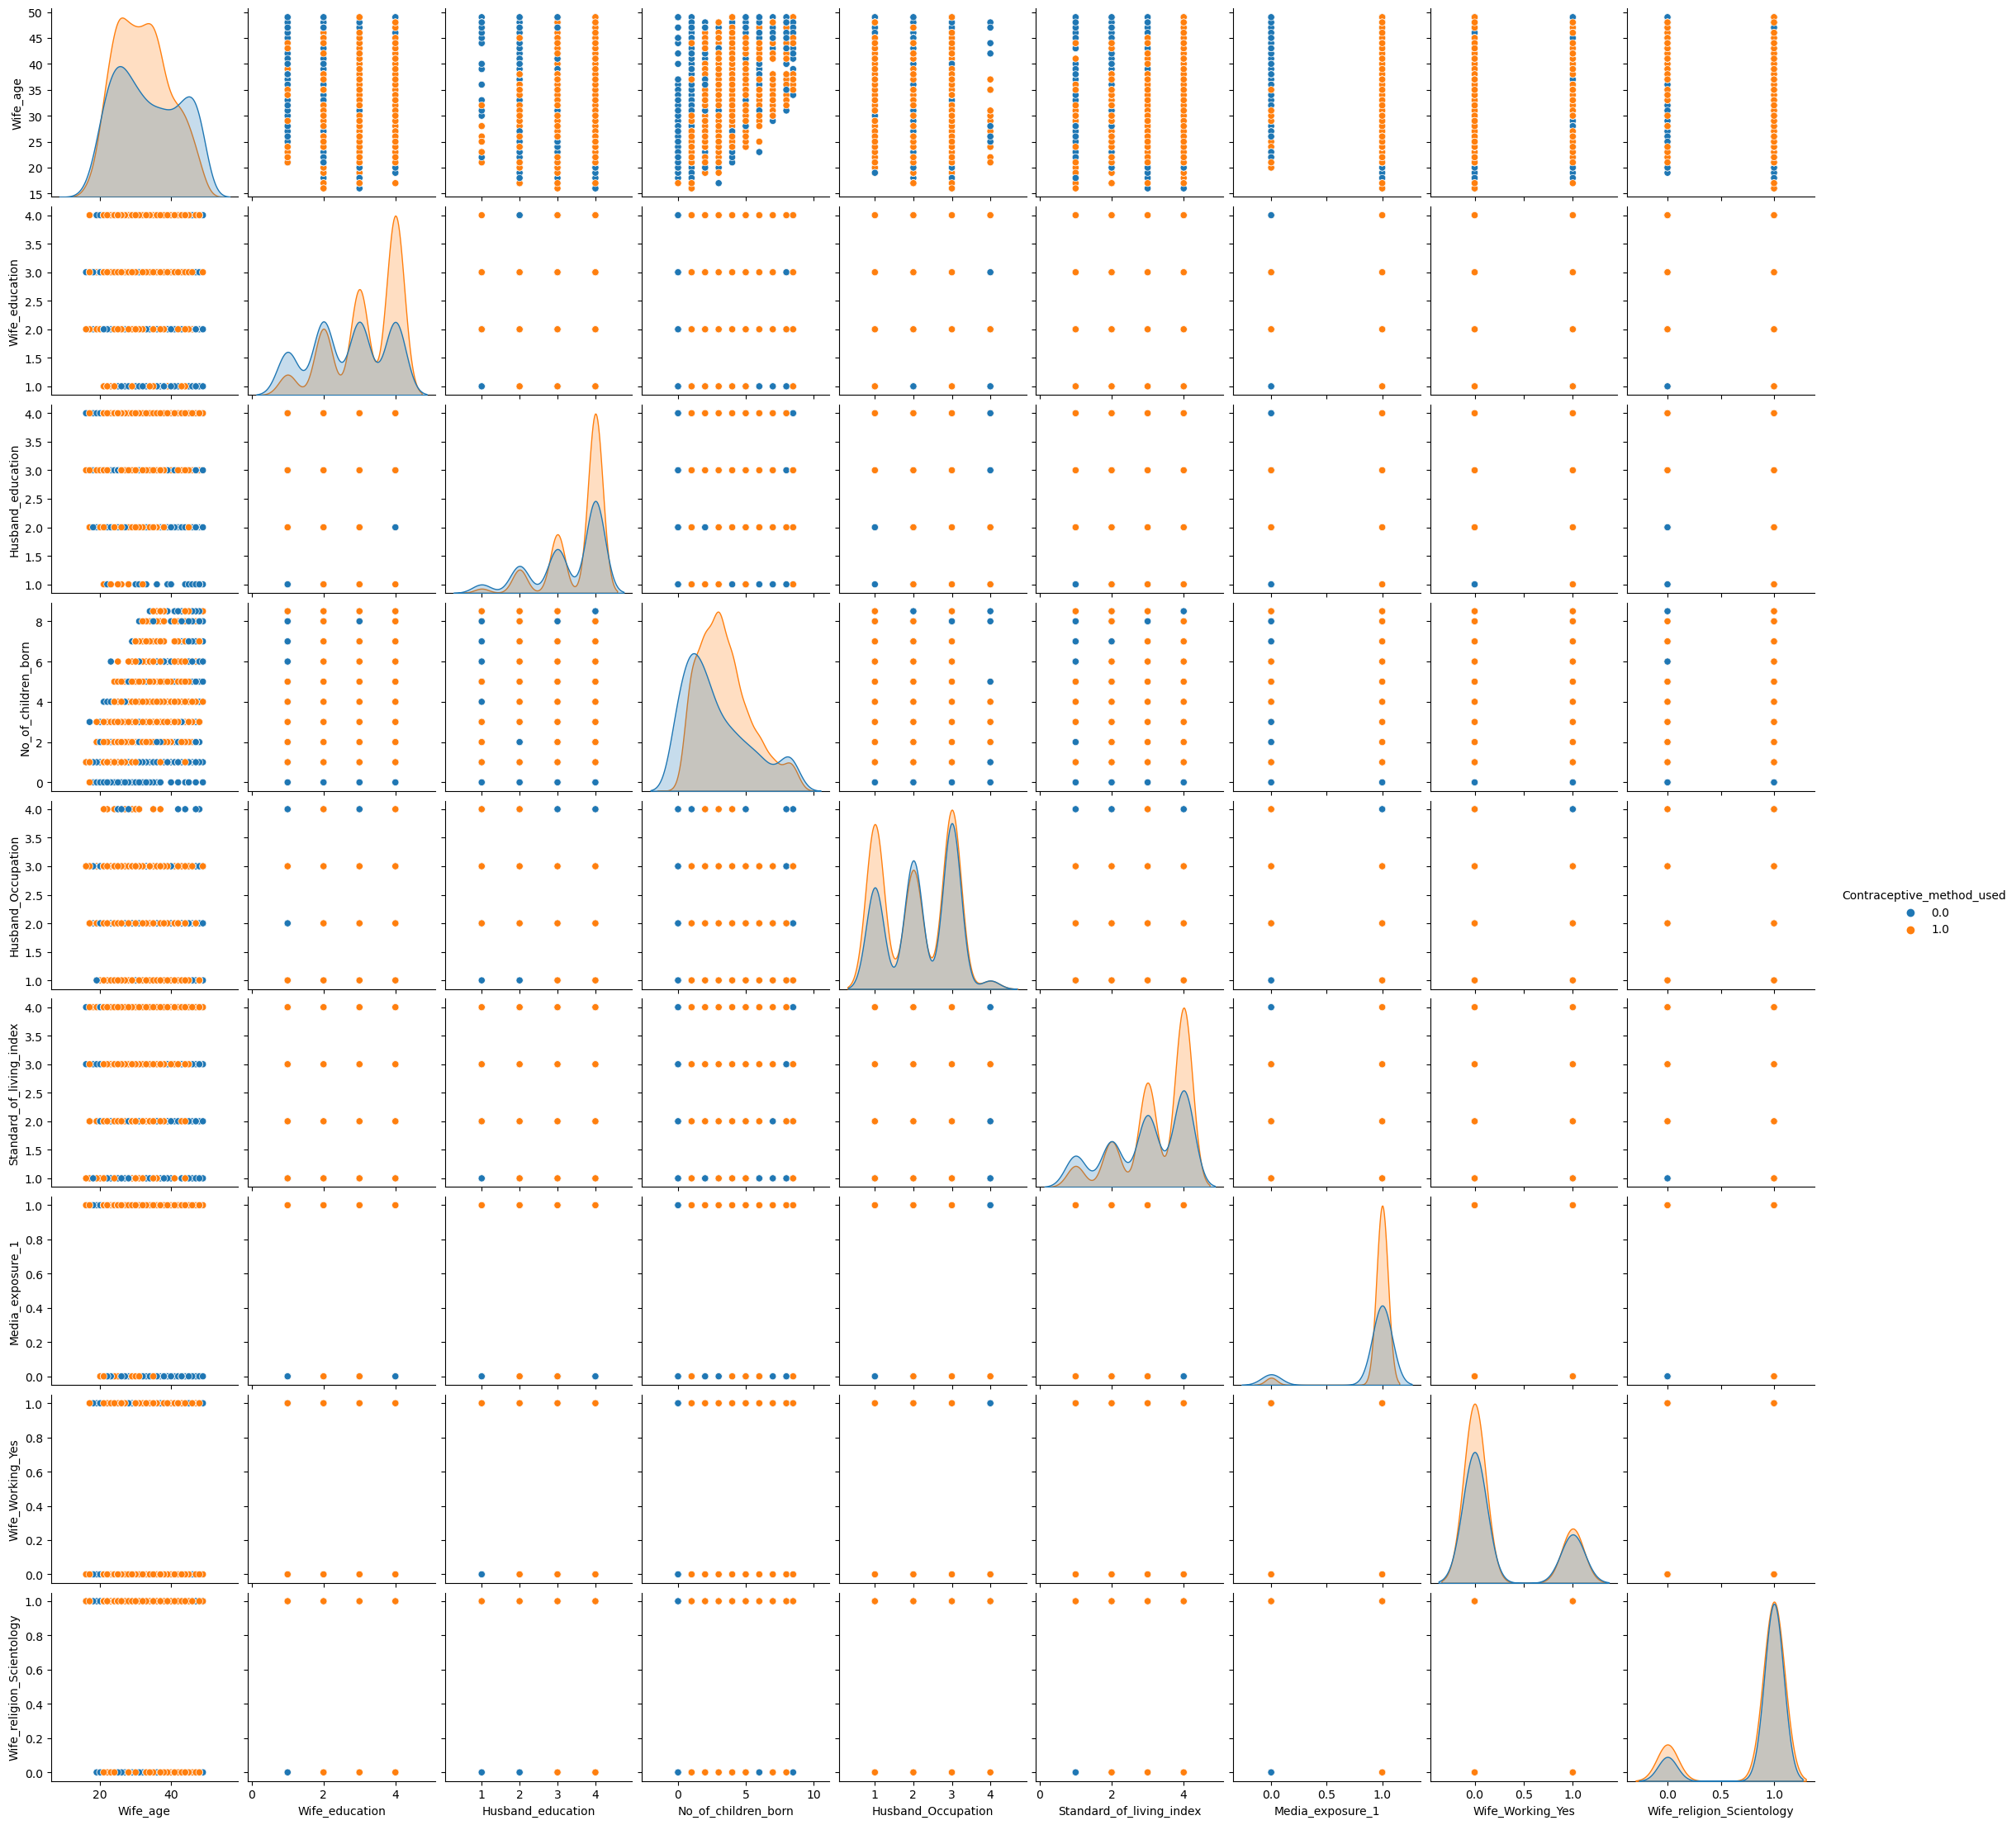

In [48]:
sns.pairplot(cData, hue='Contraceptive_method_used', diag_kind='kde');

For most features, there is little to no pattern in how individual independent variables effect target variable 

### 2.2.2 Split Data

In [150]:
X= cData.drop('Contraceptive_method_used', axis=1)
y= cData['Contraceptive_method_used']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1)

### Check for multi-collinearity

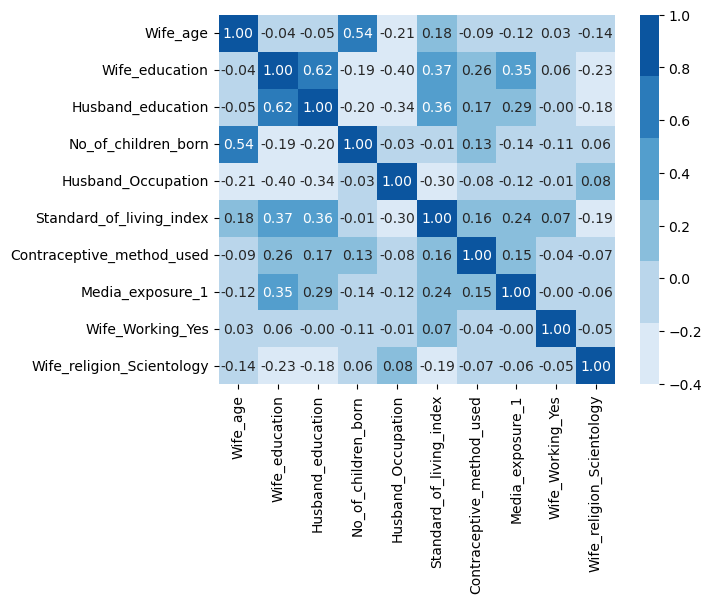

In [151]:
# Plot the correlation heatmap for all dataset
corr_mat= cData.corr()

sns.heatmap(corr_mat, annot=True, 
                cmap=sns.color_palette('Blues'), fmt='.2f', cbar=True)
plt.show();

There is a lot of corelation between variables.
The target feature is weakly/very weakly corelated to Media_exposure, Wife_age, Wife_religion, 'Wife_Working', 'Husband_Occupaion'

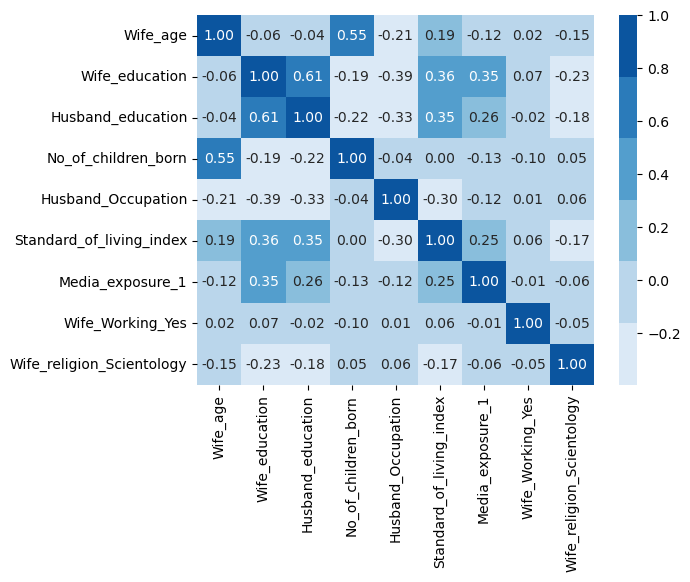

In [152]:
# Plot the correlation heatmap for all dataset
corr_mat= X_train.corr()

sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette('Blues'), fmt='.2f', cbar=True)
plt.show();

There is a strong correlation / multi collinearity between Wife and Husband Education. 'Husband Education' shall be dropped from the datatset. Standard of living has high collinearity with Husband and Wife education fetaures. No_of_Children_born is corelated with Wife_age and weakly co-related to almnst all columns. Finally, Wife_age is weakly corelated to Media_exposure & Standard_of_living.

VIF:

In [153]:
# Compute VIF for each predictor to detect multicollinearity within independent features.
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values('VIF')

,feature,VIF
7,Wife_Working_Yes,1.364255
3,No_of_children_born,4.915594
8,Wife_religion_Scientology,5.828765
4,Husband_Occupation,5.977548
5,Standard_of_living_index,14.794403
6,Media_exposure_1,14.811371
1,Wife_education,17.859016
0,Wife_age,19.909890
2,Husband_education,27.694281


Media_exposure & Wife_working has good importance according to this method as well as shown in target correlation plot.

'Wife_education' & 'Husband_Education' have multicolinearity with each other and it was already decided to drop 'Husband_education' feature based on multicollinearity heat map. Wife_age, Standard_of_living are captured using other variables.

In summary, we will try to drop below features and check the model.

In [166]:
X= cData.drop('Contraceptive_method_used', axis=1)
y= cData['Contraceptive_method_used']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1)

In [154]:
#drop_features = ['Standard_of_living_index', 'Wife_age', 'Husband_education']
drop_features = [ 'No_of_children_born','Husband_education','Wife_age','Wife_education','Standard_of_living_index','Media_exposure_1']

In [155]:
# Drop the features with high multicollinearity from the training and testing sets

X_train = X_train.drop(drop_features, axis=1)
X_test = X_test.drop(drop_features, axis=1)

In [156]:
X_train.head()

,Husband_Occupation,Wife_Working_Yes,Wife_religion_Scientology
1272,3.0,0,1
639,1.0,0,1
1340,3.0,0,1
699,2.0,1,1
996,3.0,1,1


In [157]:
X_train.head()

,Husband_Occupation,Wife_Working_Yes,Wife_religion_Scientology
1272,3.0,0,1
639,1.0,0,1
1340,3.0,0,1
699,2.0,1,1
996,3.0,1,1


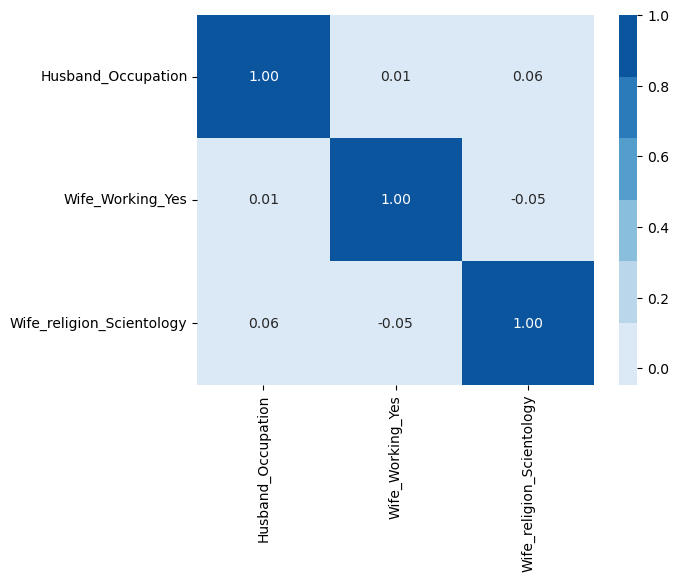

In [158]:
# Plot the correlation heatmap for all dataset
corr_mat= X_train.corr()

sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette('Blues'), fmt='.2f', cbar=True)
plt.show();

In [159]:
# Compute VIF for each predictor to detect multicollinearity within independent features.
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values('VIF')

,feature,VIF
1,Wife_Working_Yes,1.278339
2,Wife_religion_Scientology,4.007146
0,Husband_Occupation,4.105418


In [163]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 4, min_samples_split=30)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=30)

In [164]:
list(X_train)

['Husband_Occupation', 'Wife_Working_Yes', 'Wife_religion_Scientology']

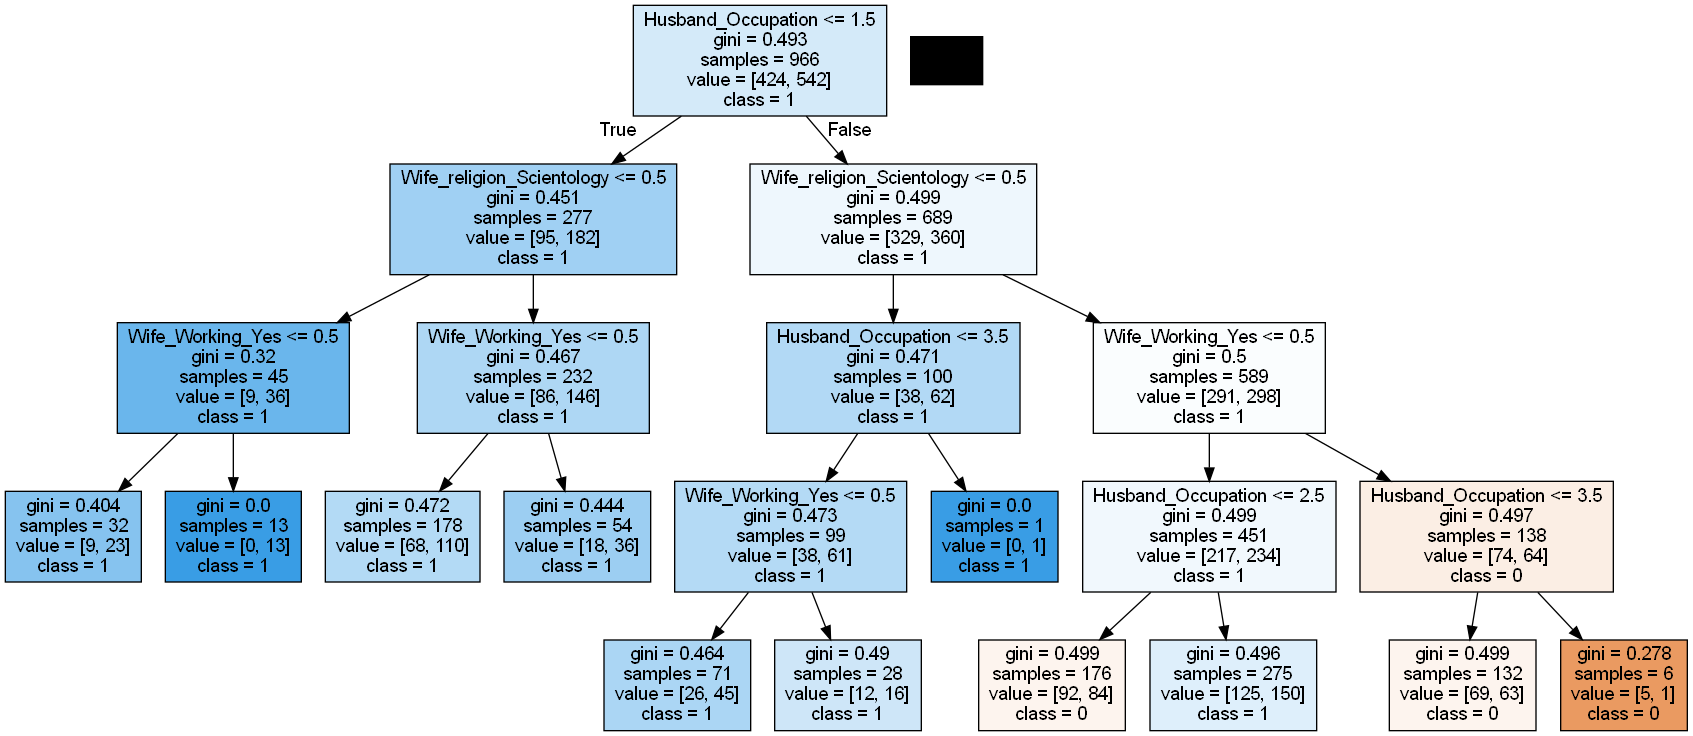

In [165]:
train_char_label=['0','1']
cData_dot_data = StringIO()
export_graphviz(dtree,out_file= cData_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(cData_dot_data.getvalue())
Image(graph[0].create_png())

'Not exposed to Media' mostly results in 'Contraceptive_method_used' as No i.e. No contraception used.
In the observations that are 'Exposed to Media-Yes', 'Standard_of_Index' effects the decision on 'Contraception_used' with 'Standard_of_Living_Index' higher than 2.5, mostly using contraception.

'Standard_of_Living_Index' is less than 1.5, in such observations 'Wife_age' plays a role in decision making on  target variable.

### 2.2.3 Logistic Regression, LDA, CART

Function to plot Conusion matrix:

In [103]:
def conf_mat(y_test, y_predict, data_cat):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Contraception Yes', 'Contraception No']
    plt.title('Confusion Matrix of {0} for {1}'.format(data_cat, name))
    plt.ylabel('Actual (True) label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames) 
    plt.xticks(rotation=45)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

Define empty lists to contain the performance metrics:

In [108]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]

All Models:

In [109]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1)),
          ('CART', DecisionTreeClassifier(criterion='gini'))]

Classification Report of Train Data using Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.58      0.30      0.39       424
         1.0       0.60      0.83      0.70       542

    accuracy                           0.60       966
   macro avg       0.59      0.56      0.54       966
weighted avg       0.59      0.60      0.56       966

Classification Report of Test Data using Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.59      0.31      0.40       205
         1.0       0.54      0.79      0.64       210

    accuracy                           0.55       415
   macro avg       0.56      0.55      0.52       415
weighted avg       0.56      0.55      0.52       415



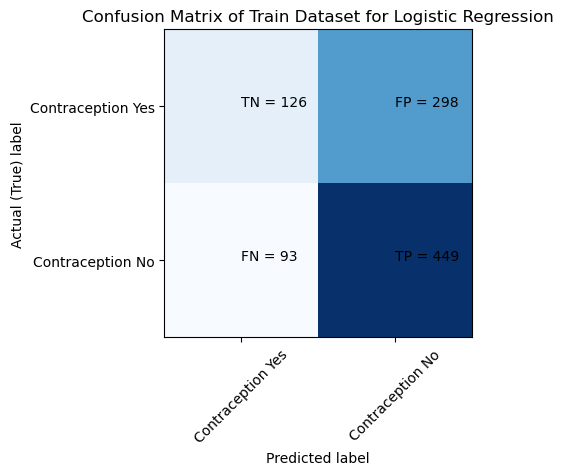

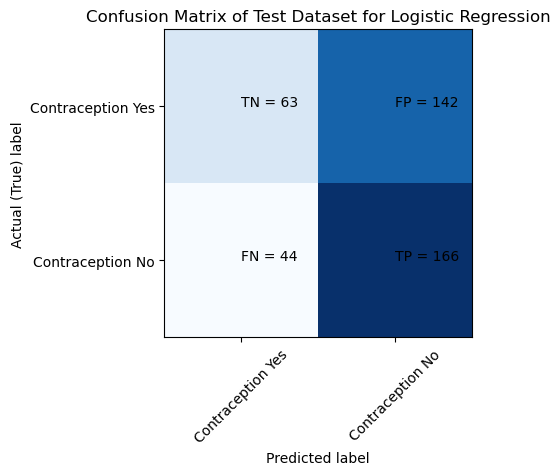

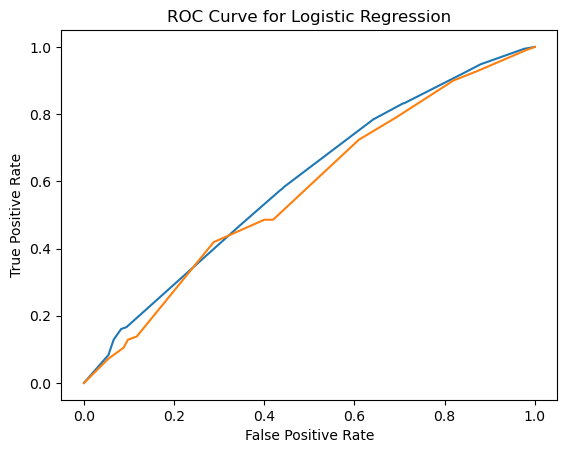


    ------   

Classification Report of Train Data using LDA:
              precision    recall  f1-score   support

         0.0       0.58      0.30      0.39       424
         1.0       0.60      0.83      0.70       542

    accuracy                           0.60       966
   macro avg       0.59      0.56      0.54       966
weighted avg       0.59      0.60      0.56       966

Classification Report of Test Data using LDA:
              precision    recall  f1-score   support

         0.0       0.59      0.31      0.40       205
         1.0       0.54      0.79      0.64       210

    accuracy                           0.55       415
   macro avg       0.56      0.55      0.52       415
weighted avg       0.56      0.55      0.52       415



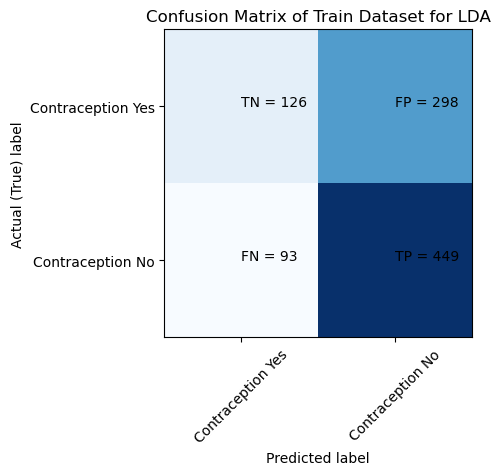

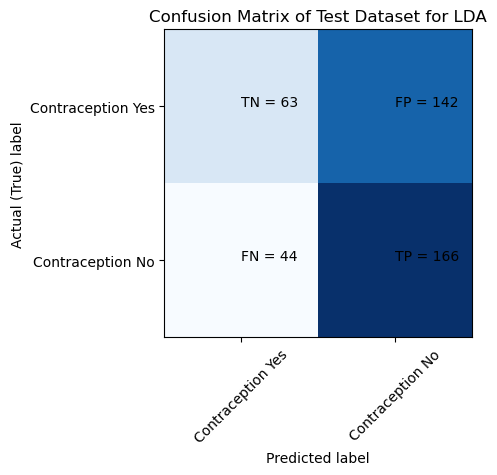

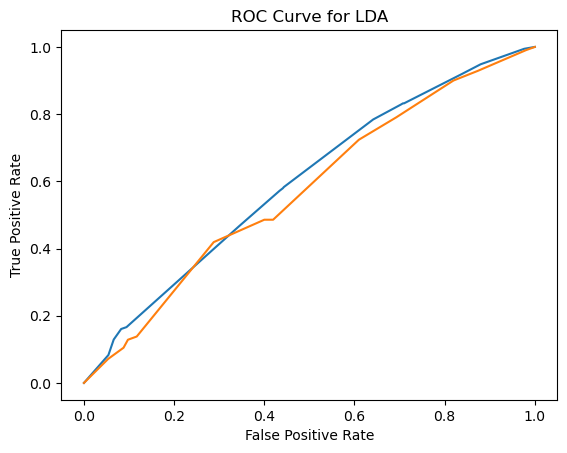


    ------   

Classification Report of Train Data using CART:
              precision    recall  f1-score   support

         0.0       0.57      0.37      0.45       424
         1.0       0.61      0.78      0.69       542

    accuracy                           0.60       966
   macro avg       0.59      0.57      0.57       966
weighted avg       0.59      0.60      0.58       966

Classification Report of Test Data using CART:
              precision    recall  f1-score   support

         0.0       0.58      0.41      0.48       205
         1.0       0.55      0.71      0.62       210

    accuracy                           0.56       415
   macro avg       0.57      0.56      0.55       415
weighted avg       0.57      0.56      0.55       415



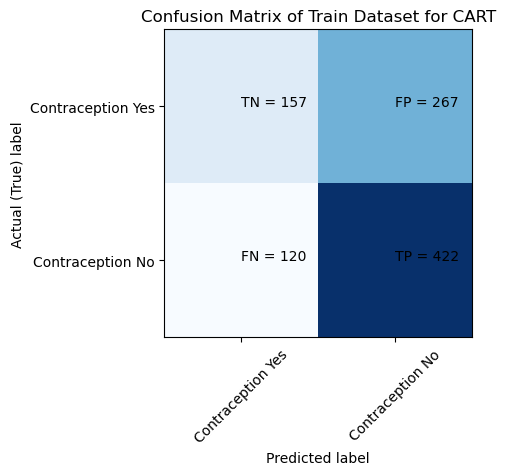

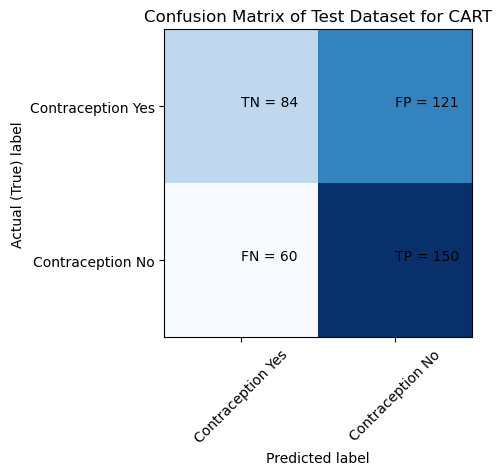

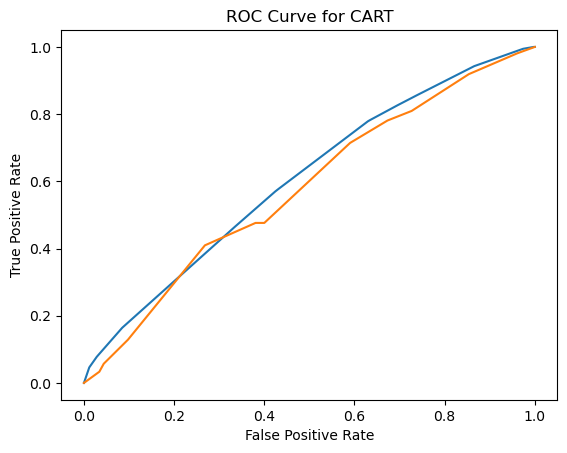


    ------   



In [110]:
for name, model in models:
    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate the performance metrics
    # Calculate Accuracy Scores
    acc_score_train = accuracy_score(y_train, y_pred_train)
    acc_score_test = accuracy_score(y_test, y_pred_test)

    #Print Classifcication Report for train & test data
    
    print('Classification Report of Train Data using {}:'.format(name))
    print(classification_report(y_train, y_pred_train))
    
    print('Classification Report of Test Data using {}:'.format(name))
    print(classification_report(y_test, y_pred_test))

    #Print Confusion Matrix

    #print("Confusion Matrix for {}:".format(name))
    #print(confusion_matrix(y_test, y_pred_test))

    #Plot Confusion Matrix for train and test data
    conf_mat(y_train, y_pred_train, 'Train Dataset')
    conf_mat(y_test, y_pred_test, 'Test Dataset')

    #Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    #Plot ROC Curve for train & test data

    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_pred_train))
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('ROC Curve for {}'.format(name))
    plt.show()

    # Calculate the roc_auc_score for train and test data
    roc_auc_score_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_score_test = roc_auc_score(y_test, y_test_proba)

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(acc_score_train)
    accuracy_test.append(acc_score_test)
    roc_auc_train.append(roc_auc_score_train)
    roc_auc_test.append(roc_auc_score_test)
    print('\n    ------   \n')

In [111]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (Train)': roc_auc_train,
    'ROC AUC (Test)': roc_auc_test
})

In [112]:
results_df.head()

,Model,Accuracy (train),Accuracy (test),ROC AUC (Train),ROC AUC (Test)
0,Logistic Regression,0.595238,0.551807,0.598245,0.572950
1,LDA,0.595238,0.551807,0.598245,0.572950
2,CART,0.599379,0.563855,0.605799,0.579036


## 2.3 Performance Metrics:
Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Best Model

With a slightly better perfomance, CART seems to be model with a better understanding of target variable.

### Untreated Models

In [70]:
X= cData.drop('Contraceptive_method_used', axis=1)
y= cData['Contraceptive_method_used']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1)

In [71]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1)),
          ('CART', DecisionTreeClassifier(criterion = 'gini'))]

In [72]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]

Classification Report of Train Data using Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.68      0.53      0.59       424
         1.0       0.69      0.81      0.74       542

    accuracy                           0.69       966
   macro avg       0.68      0.67      0.67       966
weighted avg       0.69      0.69      0.68       966

Classification Report of Test Data using Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.69      0.50      0.58       205
         1.0       0.62      0.78      0.69       210

    accuracy                           0.64       415
   macro avg       0.65      0.64      0.63       415
weighted avg       0.65      0.64      0.63       415



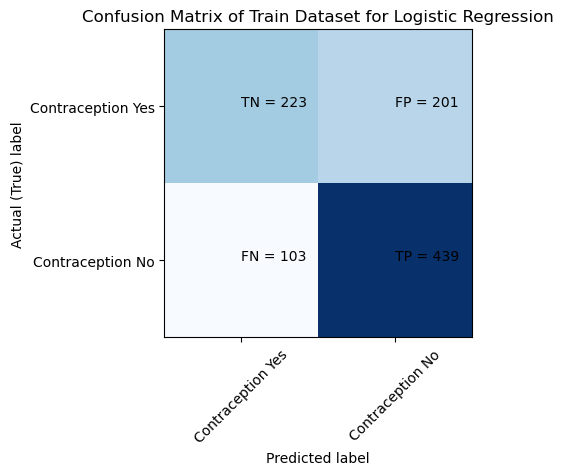

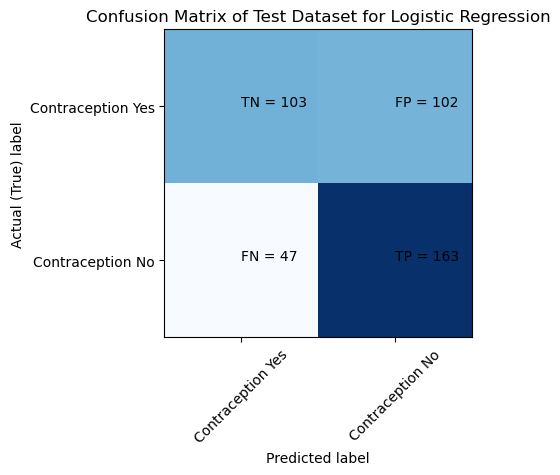

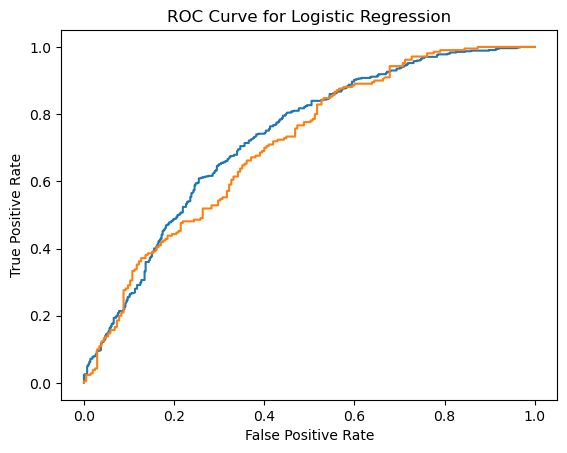


    ------   

Classification Report of Train Data using LDA:
              precision    recall  f1-score   support

         0.0       0.69      0.51      0.58       424
         1.0       0.68      0.82      0.74       542

    accuracy                           0.68       966
   macro avg       0.68      0.66      0.66       966
weighted avg       0.68      0.68      0.67       966

Classification Report of Test Data using LDA:
              precision    recall  f1-score   support

         0.0       0.68      0.49      0.57       205
         1.0       0.61      0.78      0.68       210

    accuracy                           0.64       415
   macro avg       0.65      0.63      0.63       415
weighted avg       0.65      0.64      0.63       415



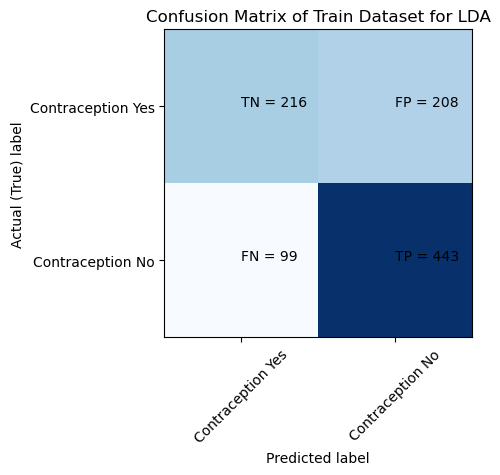

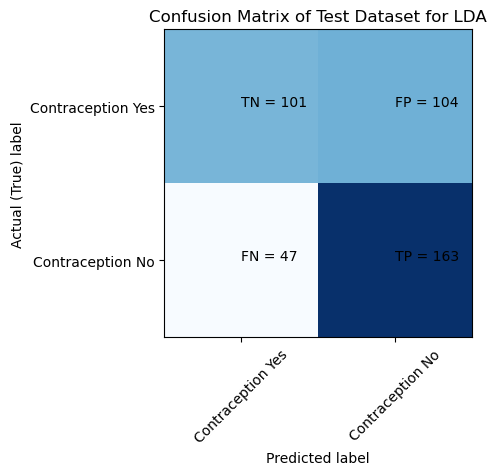

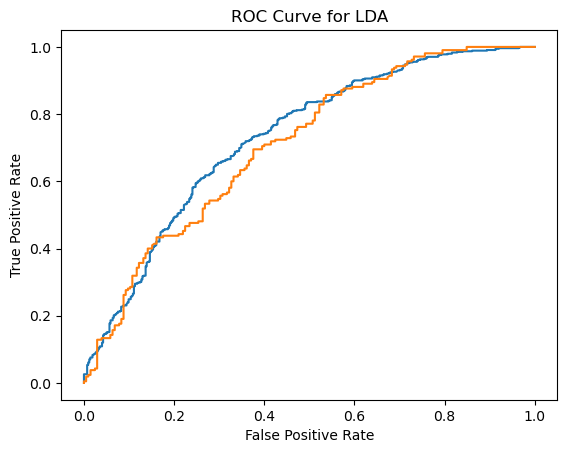


    ------   

Classification Report of Train Data using CART:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       424
         1.0       1.00      0.97      0.99       542

    accuracy                           0.98       966
   macro avg       0.98      0.98      0.98       966
weighted avg       0.98      0.98      0.98       966

Classification Report of Test Data using CART:
              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59       205
         1.0       0.60      0.65      0.63       210

    accuracy                           0.61       415
   macro avg       0.61      0.61      0.61       415
weighted avg       0.61      0.61      0.61       415



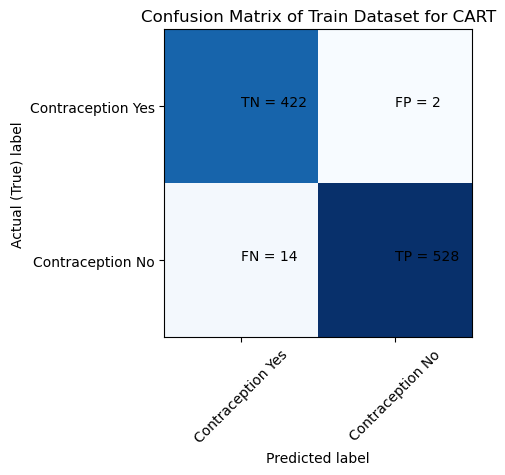

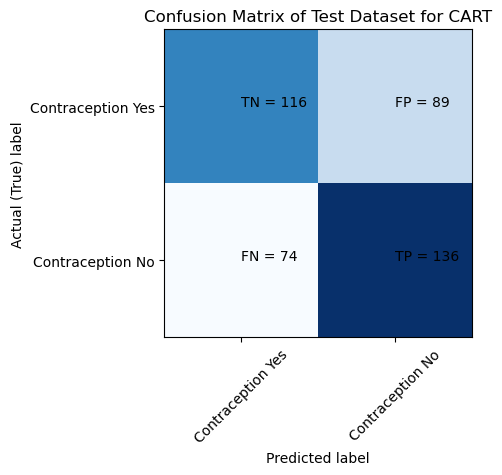

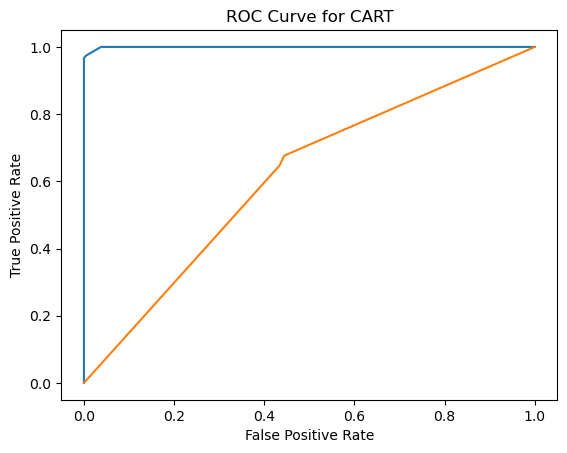


    ------   



In [73]:
for name, model in models:
    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate the performance metrics
    # Calculate Accuracy Scores
    acc_score_train = accuracy_score(y_train, y_pred_train)
    acc_score_test = accuracy_score(y_test, y_pred_test)

    #Print Classifcication Report for train & test data
    
    print('Classification Report of Train Data using {}:'.format(name))
    print(classification_report(y_train, y_pred_train))
    
    print('Classification Report of Test Data using {}:'.format(name))
    print(classification_report(y_test, y_pred_test))

    #Print Confusion Matrix

    #print("Confusion Matrix for {}:".format(name))
    #print(confusion_matrix(y_test, y_pred_test))

    #Plot Confusion Matrix for train and test data
    conf_mat(y_train, y_pred_train, 'Train Dataset')
    conf_mat(y_test, y_pred_test, 'Test Dataset')

    #Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    #Plot ROC Curve for train & test data

    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, y_pred_train))
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('ROC Curve for {}'.format(name))
    plt.show()

    # Calculate the roc_auc_score for train and test data
    roc_auc_score_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_score_test = roc_auc_score(y_test, y_test_proba)

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(acc_score_train)
    accuracy_test.append(acc_score_test)
    roc_auc_train.append(roc_auc_score_train)
    roc_auc_test.append(roc_auc_score_test)
    print('\n    ------   \n')

In [74]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (Train)': roc_auc_train,
    'ROC AUC (Test)': roc_auc_test
})

In [75]:
results_df.head(5)

,Model,Accuracy (train),Accuracy (test),ROC AUC (Train),ROC AUC (Test)
0,Logistic Regression,0.685300,0.640964,0.730244,0.709779
1,LDA,0.682195,0.636145,0.730562,0.708688
2,CART,0.983437,0.607229,0.999434,0.613101


## 2.4 Inference:
Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

'Media_exposure ', 'Wife_Working', ''

## Reflection Report

Please reflect on all that you learnt and fill this reflection report. You have to copy the link and paste it on the URL bar of your respective browser.
https://docs.google.com/forms/d/e/1FAIpQLScKuVyrmTTM7Pboh0IB4YIBUbJp2NrDZcsY4SCRn3ZUkwmLGg/viewform